# Pymaceuticals Inc.
---

### Analysis


* There are 249 mice in the study and provided in Mouse metadata file.Study results re timepoint stdies of each mice over some period f time and colects the size of tumor, We need to study results and make some inferences based on this data. Note that there were 10 Drugs used in the study. 

From the outliers of the 4 drugs studied, here is the findings

1. Infibunol has one outlier and Capomulin has least IDR which implies it is most reliable.
2. Ceftamin has largest IDR.
3. The linear regression between tumor and weight shows the correlation is strongly linear with rvalue of 0.8767060403658119
4. From one of the time vs tumor plot of mouse l509 for Capomulin, we see the tumor goes up in beginning and then the drug takes effect and tumor size reduces. This is the expected behaviour.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import seaborn as sns 

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df=pd.merge(study_results,mouse_metadata,  how='left', on='Mouse ID')
print(len(mouse_df))
mouse_df.head()



1893


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Display the data table for preview

mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [3]:
# Checking the number of mice.
len(mouse_df['Mouse ID'].value_counts())

249

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_df.nunique()
mouse_df.loc[mouse_df.duplicated(), :]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.0,0,Propriva,Female,21,26


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_dup_df=mouse_df.loc[mouse_df["Mouse ID"] == "g989"]
mouse_dup_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df = mouse_df.loc[mouse_df['Mouse ID'] != 'g989']

mouse_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.
len(mouse_df['Mouse ID'].value_counts())

248

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mouse_df1=mouse_df.groupby(['Drug Regimen'])
mouse_summary_df=mouse_df1["Tumor Volume (mm3)"].describe()
mouse_summary_df

,count,mean,std,min,25%,50%,75%,max
Drug Regimen,,,,,,,,
Capomulin,230.0,40.675741,4.994774,23.343598,37.685933,41.557809,45.000000,48.158209
Ceftamin,178.0,52.591172,6.268188,45.000000,47.208427,51.776157,56.801438,68.923185
Infubinol,178.0,52.884795,6.567243,36.321346,47.312353,51.820584,57.314444,72.226731
Ketapril,188.0,55.235638,8.279709,45.000000,48.232987,53.698743,60.870951,78.567014
Naftisol,186.0,54.331565,8.134708,45.000000,47.285874,52.509285,59.963034,76.668817
Placebo,181.0,54.033581,7.821003,45.000000,47.459053,52.288934,59.916934,73.212939
Propriva,148.0,52.320930,6.622085,45.000000,46.894328,50.446266,56.491585,72.455421
Ramicane,228.0,40.216745,4.846308,22.050126,36.674635,40.673236,45.000000,47.622816
Stelasyn,181.0,54.233149,7.710419,45.000000,48.047139,52.431737,58.719297,75.123690


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
mouse_summary_df1=mouse_df1.agg({"Tumor Volume (mm3)" : ['mean', 'median', 'var','std','sem']})
mouse_summary_df1

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Tumor Volume (mm3), dtype: int64


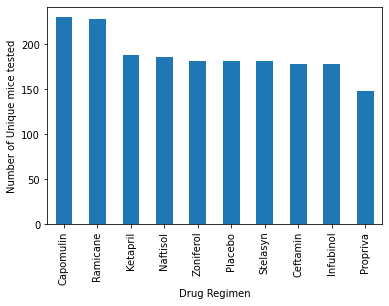

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

miceTested = mouse_df1["Tumor Volume (mm3)"].count()
miceTested=miceTested.sort_values(ascending=False)
print(miceTested)
count_chart = miceTested.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Drug Regimen")
count_chart.set_ylabel("Number of Unique mice tested")


plt.show()
plt.tight_layout()

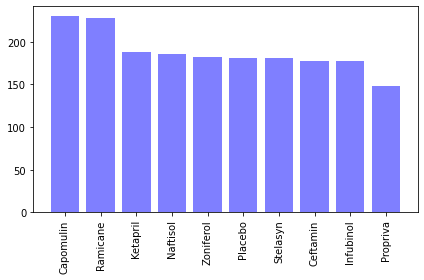

In [11]:
# Generate a bar plot showing the total number of unqiue mice tested on each drug regimen using using pyplot.
mouse_df1
drugs= ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol", "Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"]
mice_count = miceTested
x_axis = np.arange(len(drugs))
# Create a bar chart based upon the above data
plt.bar(x_axis, mice_count, color='b', alpha=0.5, align="center")

# Create the ticks for our bar chart's x axis
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin","Ramicane","Ketapril","Naftisol","Zoniferol", "Placebo","Stelasyn","Ceftamin","Infubinol","Propriva"],rotation=90)
plt.tight_layout()

plt.show()

Sex
Female    922
Male      958
Name: Mouse ID, dtype: int64


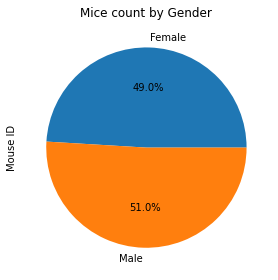

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


mouse_df1=mouse_df.groupby(['Sex'])
Sex = ["Female", "Male"]
count= mouse_df1.count()["Mouse ID"]
colors = ["blue", "orange"]

print(count)
gender_count = count.plot(kind="pie", y='Mice count',  autopct='%1.1f%%', title=("Mice count by Gender"))
plt.tight_layout()


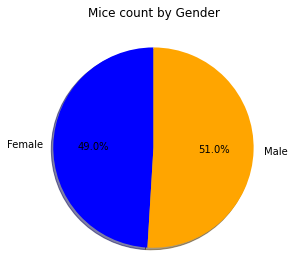

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.title("Mice count by Gender")

plt.pie(mouse_df1.count()["Mouse ID"], labels=Sex, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.tight_layout()

## Quartiles, Outliers and Boxplots

   Mouse ID  Tumor Volume (mm3)  Weight (g)
0      b128           38.982878          22
1      b742           38.939633          21
2      f966           30.485985          17
3      g288           37.074024          19
4      g316           40.159220          22
5      i557           47.685963          24
6      i738           37.311846          20
7      j119           38.125164          23
8      j246           38.753265          21
9      l509           41.483008          21
10     l897           38.846876          19
11     m601           28.430964          17
12     m957           33.329098          19
13     r157           46.539206          25
14     r554           32.377357          17
15     r944           41.581521          25
16     s185           23.343598          17
17     s710           40.728578          23
18     t565           34.455298          17
19     u364           31.023923          17
20     v923           40.658124          21
21     w150           39.952347 

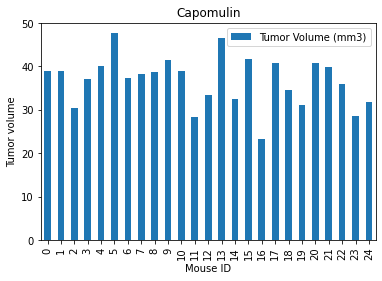

<Figure size 432x288 with 0 Axes>

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


mouse_capomulin_df=mouse_df.loc[mouse_df["Drug Regimen"]=="Capomulin"]
max_time=mouse_capomulin_df.max()["Timepoint"]

mouse_capomulin_group_df=mouse_capomulin_df.groupby(['Mouse ID'])
mouse_capomulin_max=mouse_capomulin_group_df["Timepoint"].max()
mouse_capomulin_max.head()

merged_capomulin_df = pd.merge(left=mouse_capomulin_max, right=mouse_capomulin_df, how='left', on=["Mouse ID",'Timepoint'])
merged_capomulin_df.head()

selected_columns = merged_capomulin_df[["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]]
merged_capomulin_df = selected_columns.copy()
print(merged_capomulin_df)
merged_capomulin_by_MouseID_df=merged_capomulin_df.set_index('Mouse ID')

selected_columns = merged_capomulin_df[["Mouse ID","Tumor Volume (mm3)"]]
capomulin_df = selected_columns.copy()
print(capomulin_df)
mouse_chart = capomulin_df.plot(kind="bar", title="Capomulin")
mouse_chart.set_xlabel("Mouse ID")
mouse_chart.set_ylabel("Tumor volume")
capomulin_df.head()
plt.show()
plt.tight_layout()

45
   Mouse ID  Tumor Volume (mm3)  Weight (g)
0      b128           38.982878          22
1      b742           38.939633          21
2      f966           30.485985          17
3      g288           37.074024          19
4      g316           40.159220          22
5      i557           47.685963          24
6      i738           37.311846          20
7      j119           38.125164          23
8      j246           38.753265          21
9      l509           41.483008          21
10     l897           38.846876          19
11     m601           28.430964          17
12     m957           33.329098          19
13     r157           46.539206          25
14     r554           32.377357          17
15     r944           41.581521          25
16     s185           23.343598          17
17     s710           40.728578          23
18     t565           34.455298          17
19     u364           31.023923          17
20     v923           40.658124          21
21     w150           39.9523

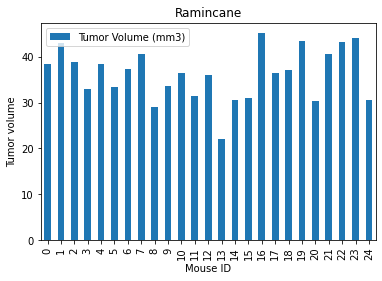

<Figure size 432x288 with 0 Axes>

In [15]:
mouse_ramicane_df=mouse_df.loc[mouse_df["Drug Regimen"]=="Ramicane"]
max_time=mouse_ramicane_df.max()["Timepoint"]

print(max_time)

mouse_ramicane_group_df=mouse_ramicane_df.groupby(['Mouse ID'])
mouse_ramicane_max=mouse_ramicane_group_df["Timepoint"].max()
mouse_ramicane_max.head()

merged_ramicane_df = pd.merge(left=mouse_ramicane_max, right=mouse_ramicane_df, how='left', on=["Mouse ID",'Timepoint'])
merged_ramicane_df.head()

selected_columns = merged_ramicane_df[["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]]
merged_ramicane_df = selected_columns.copy()
print(merged_capomulin_df)
merged_ramicane_by_MouseID_df=merged_ramicane_df.set_index('Mouse ID')

selected_columns = merged_ramicane_df[["Mouse ID","Tumor Volume (mm3)"]]
ramicane_df = selected_columns.copy()
print(ramicane_df)
mouse_chart = ramicane_df.plot(kind="bar", title="Ramincane")
mouse_chart.set_xlabel("Mouse ID")
mouse_chart.set_ylabel("Tumor volume")
ramicane_df.head()
plt.show()
plt.tight_layout()

45
   Mouse ID  Tumor Volume (mm3)  Weight (g)
0      a203           67.973419          23
1      a251           65.525743          25
2      a577           57.031862          25
3      a685           66.083066          30
4      c139           72.226731          28
5      c326           36.321346          25
6      c895           60.969711          29
7      e476           62.435404          26
8      f345           60.918767          26
9      i386           67.289621          29
10     k483           66.196912          30
11     k804           62.117279          29
12     m756           47.010364          30
13     n671           60.165180          25
14     o809           55.629428          25
15     o813           45.699331          28
16     q132           54.656549          30
17     s121           55.650681          26
18     v339           46.250112          26
19     v719           54.048608          30
20     v766           51.542431          27
21     w193           50.0051

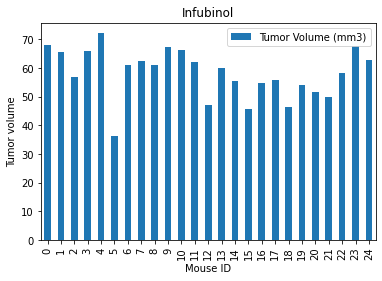

<Figure size 432x288 with 0 Axes>

In [16]:
mouse_infubinol_df=mouse_df.loc[mouse_df["Drug Regimen"]=="Infubinol"]
max_time=mouse_capomulin_df.max()["Timepoint"]

print(max_time)

mouse_infubinol_group_df=mouse_infubinol_df.groupby(['Mouse ID'])
mouse_infubinol_max=mouse_infubinol_group_df["Timepoint"].max()
mouse_infubinol_max.head()

merged_infubinol_df = pd.merge(left=mouse_infubinol_max, right=mouse_infubinol_df, how='left', on=["Mouse ID",'Timepoint'])
merged_infubinol_df.head()

selected_columns = merged_infubinol_df[["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]]
merged_infubinol_df = selected_columns.copy()
print(merged_infubinol_df)
merged_infubinol_by_MouseID_df=merged_infubinol_df.set_index('Mouse ID')

selected_columns = merged_infubinol_df[["Mouse ID","Tumor Volume (mm3)"]]
infubinol_df = selected_columns.copy()
print(infubinol_df)
mouse_chart = infubinol_df.plot(kind="bar", title="Infubinol")
mouse_chart.set_xlabel("Mouse ID")
mouse_chart.set_ylabel("Tumor volume")
infubinol_df.head()
plt.show()
plt.tight_layout()

45
   Mouse ID  Tumor Volume (mm3)  Weight (g)
0      a275           62.999356          28
1      b447           45.000000          30
2      b487           56.057749          28
3      b759           55.742829          25
4      f436           48.722078          25
5      h531           47.784682          27
6      j296           61.849023          30
7      k210           68.923185          28
8      l471           67.748662          28
9      l490           57.918381          26
10     l558           46.784535          30
11     l661           59.851956          26
12     l733           64.299830          30
13     o287           59.741901          28
14     p438           61.433892          26
15     q483           64.192341          26
16     t573           45.000000          27
17     u149           52.925348          29
18     u153           45.000000          25
19     w151           67.527482          25
20     x226           45.000000          28
21     x581           64.6349

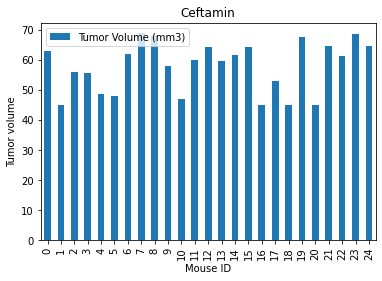

<Figure size 432x288 with 0 Axes>

In [17]:
mouse_ceftamin_df=mouse_df.loc[mouse_df["Drug Regimen"]=="Ceftamin"]
max_time=mouse_ceftamin_df.max()["Timepoint"]

print(max_time)

mouse_ceftamin_group_df=mouse_ceftamin_df.groupby(['Mouse ID'])
mouse_ceftamin_max=mouse_ceftamin_group_df["Timepoint"].max()
mouse_ceftamin_max.head()

merged_ceftamin_df = pd.merge(left=mouse_ceftamin_max, right=mouse_ceftamin_df, how='left', on=["Mouse ID",'Timepoint'])
merged_ceftamin_df.head()

selected_columns = merged_ceftamin_df[["Mouse ID","Tumor Volume (mm3)", "Weight (g)"]]
merged_ceftamin_df = selected_columns.copy()
print(merged_ceftamin_df)
merged_ceftamin_by_MouseID_df=merged_ceftamin_df.set_index('Mouse ID')

selected_columns = merged_ceftamin_df[["Mouse ID","Tumor Volume (mm3)"]]
ceftamin_df = selected_columns.copy()
print(ceftamin_df)
mouse_chart = ceftamin_df.plot(kind="bar", title="Ceftamin")
mouse_chart.set_xlabel("Mouse ID")
mouse_chart.set_ylabel("Tumor volume")
ceftamin_df.head()
plt.show()
plt.tight_layout()


In [18]:
# Put treatments into a list for for loop (and later for plot labels)
#treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
#tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
#for drug in treatment_list:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    # Determine outliers using upper and lower bounds
    

mouse_df.head()
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in treatment_list:
    print(drug)
    mouse_df1=mouse_df.loc[mouse_df["Drug Regimen"]==drug]
    tumor_vol_list=mouse_df1.iloc[:,2]
    tumor_vol_list.reset_index(drop=True, inplace=True)
#    print(tumor_vol_list)
#    tumor_vol_list=pd.concat([courses,fees],axis=1)
    #print(tumor_vol_list)
    #df = pd.DataFrame(tumor_vol_list)
    quartiles=mouse_df1.iloc[:,2].quantile([.25,.5,.75])
#    print(quartiles)
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {drug} is: {lowerq}")
    print(f"The upper quartile of {drug} is: {upperq}")
    print(f"The interquartile range of {drug} is: {iqr}")
    print(f"The the median of {drug} is: {quartiles[0.5]} ")
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"Values below {lower_bound} could be outliers.")
    print(f"Values above {upper_bound} could be outliers.")
    tumor_array = np.array(tumor_vol_list)
    print(f" There are {(tumor_array >= upper_bound).sum() + (tumor_array < lower_bound).sum()} outliers")
    ((tumor_array >= upper_bound).sum() == tumor_array.size).astype(np.int)
    tumor_vol_list = []

Capomulin
The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.
 There are 2 outliers
Ramicane
The lower quartile of Ramicane is: 36.674634585
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415
The the median of Ramicane is: 40.67323554 
Values below 24.1865864625 could be outliers.
Values above 57.488048122500004 could be outliers.
 There are 1 outliers
Infubinol
The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.
 There are 0 outliers
Ceftamin
The lower

<ipython-input-18-c54ef44f951c>:48: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ((tumor_array >= upper_bound).sum() == tumor_array.size).astype(np.int)


  Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen  \
0     b128          0                45.0                 0    Capomulin   
1     f932          0                45.0                 0     Ketapril   
2     g107          0                45.0                 0     Ketapril   
3     a457          0                45.0                 0     Ketapril   
4     c819          0                45.0                 0     Ketapril   

      Sex  Age_months  Weight (g)  
0  Female           9          22  
1    Male          15          29  
2  Female           2          29  
3  Female          11          30  
4    Male          21          25  
25


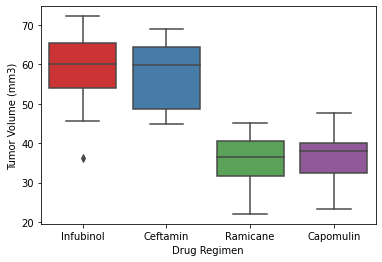

<Figure size 432x288 with 0 Axes>

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


print(mouse_df.head())
print(len(capomulin_df))
mouse_df.head()

mouse_truncated_df=mouse_df.loc[(mouse_df["Drug Regimen"] == "Capomulin")| 
                                (mouse_df["Drug Regimen"] == "Ramicane") |
                                (mouse_df["Drug Regimen"] == "Infubinol") | 
                                (mouse_df["Drug Regimen"] == "Ceftamin")]

mouse_group_df=mouse_truncated_df.groupby(['Mouse ID'])
mouse_group_df.head()
mouse_truncated_max=mouse_group_df["Timepoint"].max()

merged_df = pd.merge(left=mouse_truncated_max, right=mouse_truncated_df, how='left', on=["Mouse ID",'Timepoint'])

#merged_df.boxplot(by ='Drug Regimen', column =['Tumor Volume (mm3)'], grid = False,rot=90,color="red")
sns.boxplot(x='Drug Regimen', y="Tumor Volume (mm3)",
            data=merged_df, palette="Set1")
plt.show()
plt.tight_layout()

## Line and Scatter Plots

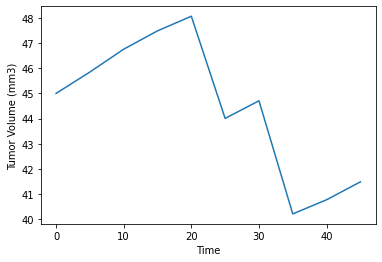

In [20]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouse_truncated_max=mouse_group_df["Timepoint"].max()
mouse_truncated_max.head()


mouse_df1=mouse_df.loc[(mouse_df["Drug Regimen"]=="Capomulin") & (mouse_df["Mouse ID"] == "l509")]

tumor_vol_list=mouse_df1.iloc[:,2]
time = mouse_df1.iloc[:,1]
plt.plot(time, tumor_vol_list)
plt.xlabel("Time")
plt.ylabel("Tumor Volume (mm3)")
# Show the graph that we have created
plt.show()

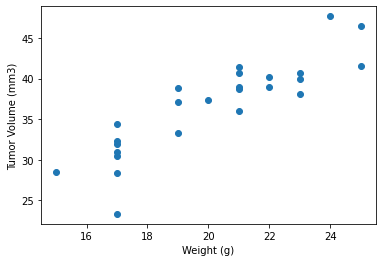

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
231,l509,0,45.000000,0,Capomulin,Male,17,21
253,l509,5,45.851193,0,Capomulin,Male,17,21
539,l509,10,46.759074,0,Capomulin,Male,17,21
881,l509,15,47.488599,1,Capomulin,Male,17,21
982,l509,20,48.070452,2,Capomulin,Male,17,21


In [21]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

plt.scatter(merged_capomulin_by_MouseID_df['Weight (g)'],merged_capomulin_by_MouseID_df['Tumor Volume (mm3)'])
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

plt.show()
mouse_df1.head()


## Correlation and Regression

LinregressResult(slope=1.750468228958504, intercept=1.4481469525549002, rvalue=0.8767060403658119, pvalue=9.0844290886732e-09, stderr=0.20026513236453639, intercept_stderr=4.068291402922092)


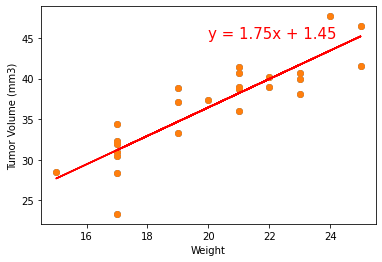

In [23]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



from scipy.stats import linregress
import numpy as np
from sklearn import datasets
x_values = merged_capomulin_by_MouseID_df['Weight (g)']
y_values = merged_capomulin_by_MouseID_df['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
print(linregress(x_values, y_values))

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight')
plt.ylabel('Tumor Volume (mm3)')

regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,45),fontsize=15,color="red")
plt.show()